# EDA — Rainfall (India)
**Purpose:** Load subdivision-wise monsoon rainfall table, compute India-average monsoon (JUN–SEP), visualize trend and optional state-level analysis.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base = r"C:\Users\Vishakha Khokhar\Desktop\Project"
clean_path = os.path.join(base, "cleaned_data")
visuals = os.path.join(base, "visuals")
os.makedirs(visuals, exist_ok=True)


In [2]:
rain_file = os.path.join(clean_path, "rainfall_india_clean.csv")
print("Loading:", rain_file)
rain = pd.read_csv(rain_file)
rain.head()


Loading: C:\Users\Vishakha Khokhar\Desktop\Project\cleaned_data\rainfall_india_clean.csv


,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9


In [3]:
print("Shape:", rain.shape)
print("Columns:", rain.columns.tolist())
print("Missing per column:\n", rain.isna().sum())


Shape: (4332, 7)
Columns: ['subdivision', 'YEAR', 'JUN', 'JUL', 'AUG', 'SEP', 'JUN-SEP']
Missing per column:
 subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
JUN-SEP        0
dtype: int64


In [4]:
# Ensure YEAR and monthly/jun-sep columns are numeric
rain['YEAR'] = pd.to_numeric(rain['YEAR'], errors='coerce')
for c in ['JUN','JUL','AUG','SEP','JUN-SEP']:
    if c in rain.columns:
        rain[c] = pd.to_numeric(rain[c], errors='coerce')

# drop invalid years
rain = rain.dropna(subset=['YEAR'])


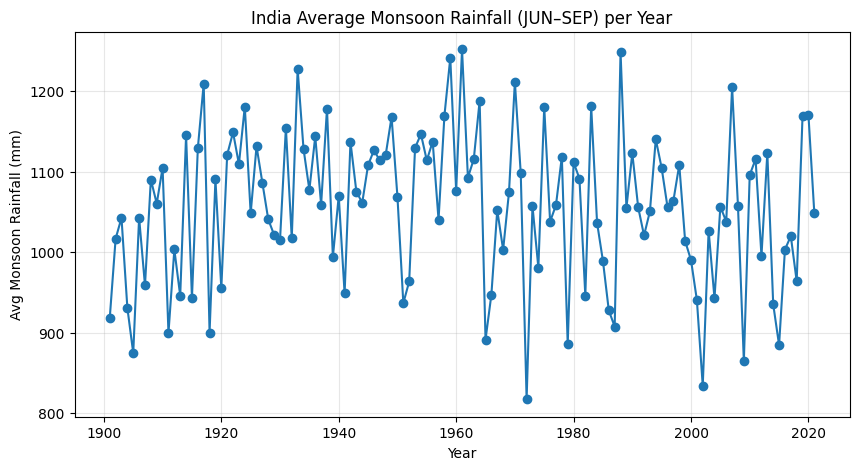

Saved: C:\Users\Vishakha Khokhar\Desktop\Project\visuals\rainfall_yearly_from_notebook.png


In [5]:
# Group across subdivisions to get average monsoon total per year
if 'JUN-SEP' in rain.columns:
    yearly_rain = rain.groupby('YEAR')['JUN-SEP'].mean().reset_index()
else:
    # If no JUN-SEP, sum months
    rain['JUN-SEP'] = rain[['JUN','JUL','AUG','SEP']].sum(axis=1)
    yearly_rain = rain.groupby('YEAR')['JUN-SEP'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(yearly_rain['YEAR'], yearly_rain['JUN-SEP'], marker='o')
plt.title("India Average Monsoon Rainfall (JUN–SEP) per Year")
plt.xlabel("Year"); plt.ylabel("Avg Monsoon Rainfall (mm)")
plt.grid(alpha=0.3)
fn = os.path.join(visuals, "rainfall_yearly_from_notebook.png")
plt.savefig(fn, bbox_inches='tight')
plt.show()
print("Saved:", fn)


In [6]:
# Example: plot monsoon trend for a single subdivision/state
sub = 'ANDAMAN'  # change to any subdivision name present in your file
if 'subdivision' in rain.columns:
    sub_df = rain[rain['subdivision'].str.upper() == sub.upper()].copy()
    if not sub_df.empty:
        sub_df = sub_df.sort_values('YEAR')
        plt.figure(figsize=(10,5))
        plt.plot(sub_df['YEAR'], sub_df['JUN-SEP'], marker='o')
        plt.title(f"Monsoon (JUN-SEP) for {sub}")
        plt.xlabel("Year"); plt.ylabel("Monsoon (mm)")
        plt.grid(alpha=0.3)
        fn = os.path.join(visuals, f"rainfall_{sub.lower()}_trend.png")
        plt.savefig(fn, bbox_inches='tight')
        plt.show()
        print("Saved:", fn)
    else:
        print("Subdivision not found:", sub)
else:
    print("No 'subdivision' column to filter by.")


Subdivision not found: ANDAMAN


**Observations & Next steps:**  
- Check long-term variability, compute anomalies relative to 1951–1980 baseline.  
- Identify extreme years (top/bottom percentiles).  
.
